In [1]:
from rewiring import rewiring
import matplotlib.pyplot as plt
import numpy as np

In [2]:
index = ["dolphins","pdzbase","GBPT_train",
         "hamsterster","Roget","flight"]
index_bus = ["london","paris","berlin","sydney","detroit","beijing"]

In [3]:
real_networks = [rewiring(item) for item in index]
bus_networks = [rewiring(item,bus = True) for item in index_bus]

In [4]:
for niter in range(10):
    for item in real_networks:
        item.experiment("P",1)
        item.write_result("P")
        item.experiment("S",1)
        item.write_result("S")
    for item in bus_networks:
        item.experiment("P",1)
        item.write_result("P")
        item.experiment("S",1)
        item.write_result("S")

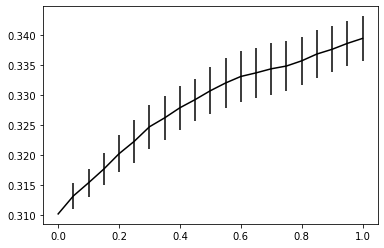

In [43]:
real_networks[1].one_stop("P",90)

<ipython-input-46-a51dbd1be3a0>:22: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(4,3,1);plt.ylabel("$OdC$",fontsize=18);plt.legend(fontsize = 12);plt.title("Dolphins",fontsize=15)
<ipython-input-46-a51dbd1be3a0>:23: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(4,3,2);plt.title("PDZBase",fontsize=15)
<ipython-input-46-a51dbd1be3a0>:24: MatplotlibDeprecationWarning: Adding an axes using the same arguments

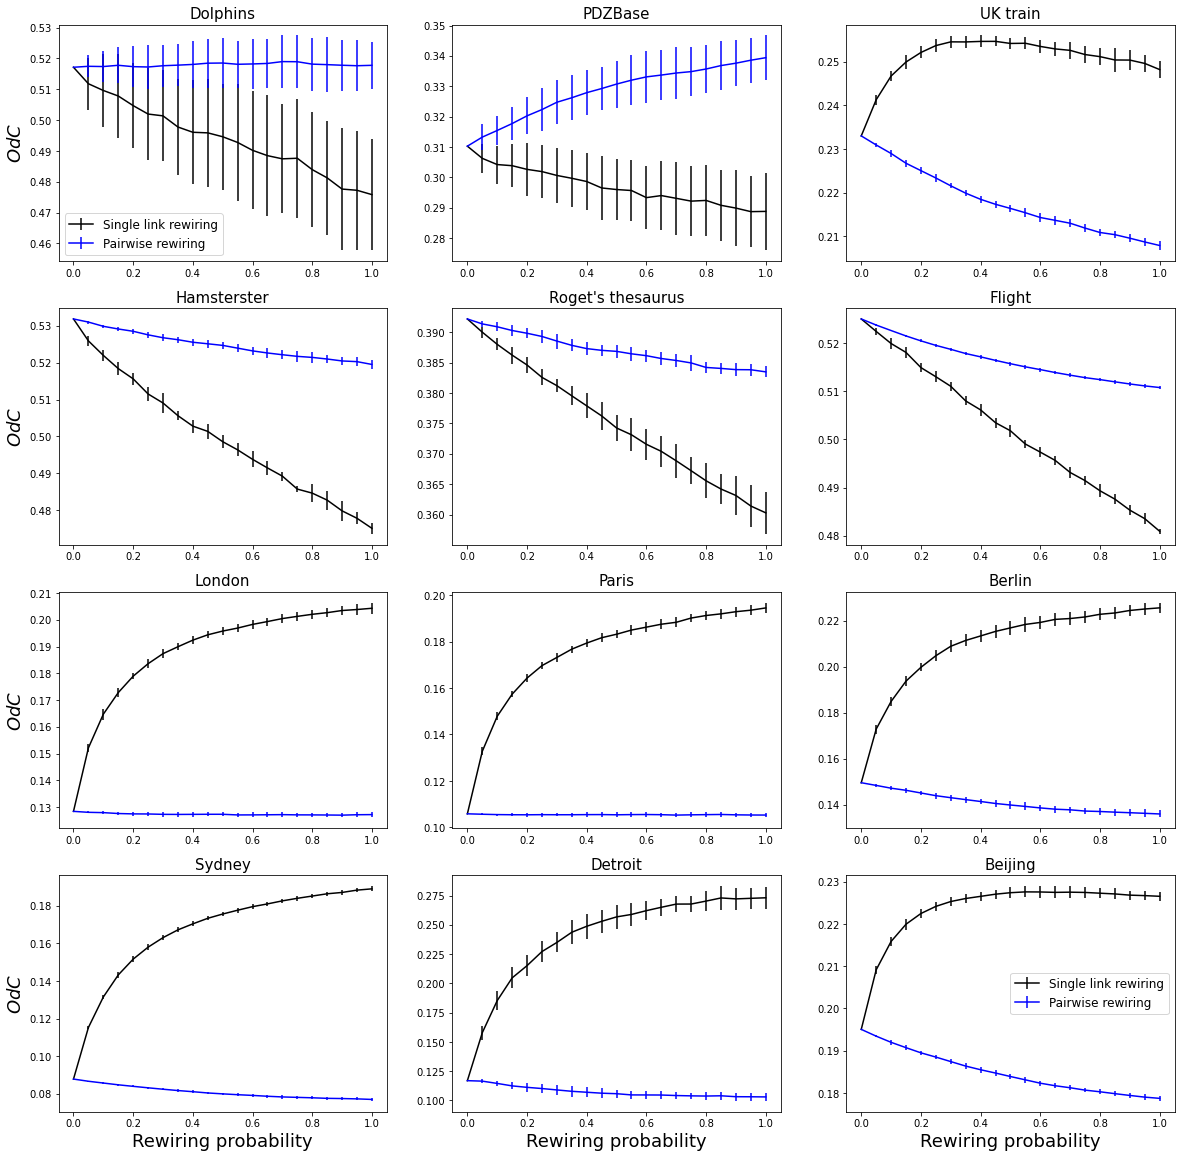

In [46]:
plt.figure(figsize=(20,20))
step_prob = 0.05
prob_list = np.linspace(0,1,int(1/(step_prob)+1))
for i in range(len(real_networks)):
    plt.subplot(4,3,i+1)
    mean = [np.mean(row) for index, row in real_networks[i].s_result.iterrows()]
    std = [np.std(row) for index, row in real_networks[i].s_result.iterrows()]
    plt.errorbar(prob_list,mean,yerr = std,color = "black",label = "Single link rewiring")
    mean = [np.mean(row) for index, row in real_networks[i].p_result.iterrows()]
    std = [np.std(row) for index, row in real_networks[i].p_result.iterrows()]
    plt.errorbar(prob_list,mean,yerr = std,color = "blue",label = "Pairwise rewiring")
    plt.title(index[i].capitalize(),fontsize=15)
for i in range(len(real_networks)):
    plt.subplot(4,3,6+i+1)
    mean = [np.mean(row) for index, row in bus_networks[i].s_result.iterrows()]
    std = [np.std(row) for index, row in bus_networks[i].s_result.iterrows()]
    plt.errorbar(prob_list,mean,yerr = std,color = "black",label = "Single link rewiring")
    mean = [np.mean(row) for index, row in bus_networks[i].p_result.iterrows()]
    std = [np.std(row) for index, row in bus_networks[i].p_result.iterrows()]
    plt.errorbar(prob_list,mean,yerr = std,color = "blue",label = "Pairwise rewiring")
    plt.title(index_bus[i].capitalize(),fontsize=15)
plt.subplot(4,3,1);plt.ylabel("$OdC$",fontsize=18);plt.legend(fontsize = 12);plt.title("Dolphins",fontsize=15)
plt.subplot(4,3,2);plt.title("PDZBase",fontsize=15)
plt.subplot(4,3,3);plt.title("UK train",fontsize=15)
plt.subplot(4,3,4);plt.ylabel("$OdC$",fontsize=18);
plt.subplot(4,3,5);plt.title("Roget's thesaurus",fontsize=15)
plt.subplot(4,3,7);plt.ylabel("$OdC$",fontsize=18)
plt.subplot(4,3,10);plt.xlabel("Rewiring probability",fontsize=18);plt.ylabel("$OdC$",fontsize=18)
plt.subplot(4,3,11);plt.xlabel("Rewiring probability",fontsize=18)
plt.subplot(4,3,12);plt.xlabel("Rewiring probability",fontsize=18);plt.legend(fontsize = 12)
plt.savefig("figures/rewiring.eps",format = "eps")